<a href="https://colab.research.google.com/github/Deepikagarg22/Employee-Atrition/blob/main/Copy_of_Employee_Attrition1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

#Never display warnings when match
import warnings
warnings.filterwarnings('ignore')

# for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

## **Loading of data**

In [ ]:
# Load the dataset
df = pd.read_excel('MFG10.xlsx') 

In [ ]:
# Showing dimensions of data
df.shape

(49653, 18)

In [ ]:
# Showing first five rows
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1954-03-01 00:00:00,8/28/1989,1900-01-01 00:00:00,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1954-03-01 00:00:00,8/28/1989,1900-01-01 00:00:00,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1954-03-01 00:00:00,8/28/1989,1900-01-01 00:00:00,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1954-03-01 00:00:00,8/28/1989,1900-01-01 00:00:00,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1954-03-01 00:00:00,8/28/1989,1900-01-01 00:00:00,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


# **Missing Values**

In [ ]:
# Checking Missing Values
df.isnull().sum()

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

There is no missing values in the dataset.

In [ ]:
# To see datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

# **Data Cleaning**

In [ ]:
# dropping some columns 
df.drop(['EmployeeID', 'birthdate_key', 'recorddate_key', 'gender_full'], axis=1, inplace=True)

I have deleted EmployeeID, birthdate_key, recorddate_key because there is no need of these columns and delete gender_full because we have gender_short. both indicates same values.




In [ ]:
df.head()

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,8/28/1989,1900-01-01 00:00:00,52,17,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,8/28/1989,1900-01-01 00:00:00,53,18,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,8/28/1989,1900-01-01 00:00:00,54,19,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,8/28/1989,1900-01-01 00:00:00,55,20,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,8/28/1989,1900-01-01 00:00:00,56,21,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


**Checking unique values of each column**

In [ ]:
df.city_name.unique()

array(['Vancouver', 'Terrace', 'Nanaimo', 'Nelson', 'Kelowna', 'Victoria',
       'Kamloops', 'Fort St John', 'Surrey', 'Vernon', 'Quesnel',
       'Chilliwack', 'Dawson Creek', 'Squamish', 'New Westminster',
       'Port Coquitlam', 'Cortes Island', 'Burnaby', 'Bella Bella',
       'Cranbrook', 'Williams Lake', 'Trail', 'Prince George', 'Richmond',
       'Grand Forks', 'West Vancouver', 'Abbotsford', 'Aldergrove',
       'Langley', 'North Vancouver', 'White Rock', 'New Westminister',
       'Fort Nelson', 'Haney', 'Valemount', 'Ocean Falls', 'Princeton',
       'Dease Lake', 'Pitt Meadows', 'Blue River'], dtype=object)

In [ ]:
df.department_name.unique()

array(['Executive', 'Store Management', 'Meats', 'Recruitment',
       'Training', 'Labor Relations', 'HR Technology', 'Employee Records',
       'Compensation', 'Legal', 'Produce', 'Accounts Receiveable',
       'Bakery', 'Information Technology', 'Accounts Payable', 'Audit',
       'Accounting', 'Investment', 'Dairy', 'Processed Foods',
       'Customer Service'], dtype=object)

In [ ]:
df.job_title.unique()

array(['CEO', 'VP Stores', 'Legal Counsel', 'VP Human Resources',
       'VP Finance', 'Exec Assistant, VP Stores',
       'Exec Assistant, Legal Counsel', 'CHief Information Officer',
       'Store Manager', 'Meats Manager',
       'Exec Assistant, Human Resources', 'Exec Assistant, Finance',
       'Director, Recruitment', 'Director, Training',
       'Director, Labor Relations', 'Director, HR Technology',
       'Director, Employee Records', 'Director, Compensation',
       'Corporate Lawyer', 'Produce Manager',
       'Director, Accounts Receivable', 'Bakery Manager',
       'Systems Analyst', 'Director, Accounts Payable', 'Director, Audit',
       'Director, Accounting', 'Director, Investments', 'Dairy Person',
       'Recruiter', 'Processed Foods Manager', 'Customer Service Manager',
       'Trainer', 'Meat Cutter', 'Labor Relations Analyst',
       'Dairy Manager', 'HRIS Analyst', 'Benefits Admin',
       'Compensation Analyst', 'Accounts Receiveable Clerk',
       'Accounts Pay

In [ ]:
df.store_name.unique()

array([35, 32, 18, 19, 16, 37, 15, 12, 31, 36, 28,  6,  9, 30, 21, 46, 25,
        7,  5,  3,  8, 40, 33, 26, 29, 41, 13, 38, 42,  1,  2, 43, 44, 17,
       45, 22, 39, 20, 11, 14, 34, 23, 27, 10, 24,  4])

In [ ]:
df.STATUS_YEAR.unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [ ]:
df.STATUS.unique()

array(['ACTIVE', 'TERMINATED'], dtype=object)

In [ ]:
df.BUSINESS_UNIT.unique()

array(['HEADOFFICE', 'STORES'], dtype=object)

In [ ]:
# converting job_title into 4 categories

board = ['CEO','VP Stores', 'Director, Recruitment', 'VP Human Resources', 'VP Finance', 'Director, Accounts Receivable', 
         'Director, Accounting', 'Director, Employee Records', 'Director, Accounts Payable', 'Director, HR Technology', 
         'Director, Investments', 'Director, Labor Relations', 'Director, Audit', 'Director, Training',
         'Director, Compensation']

executive = [ 'Exec Assistant, VP Stores', 'Exec Assistant, Legal Counsel', 'CHief Information Officer', 
             'Exec Assistant, Human Resources', 'Exec Assistant, Finance']

manager = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager']

employee = ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier',
            'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel']

def job_title(job):
    if job in board: return 'board'
    if job in executive: return 'executive'
    if job in manager: return 'manager'
    if job in employee: return 'employee'

df['job_title'] = df['job_title'].map(job_title)

In [ ]:
df.job_title.unique()

array(['board', 'employee', 'executive', 'manager'], dtype=object)

In [ ]:
# now change the city_names

city_population = {
    'Vancouver':2313328,
     'Victoria':289625,
     'Nanaimo':84905,
     'New Westminster':58549,
     'Kelowna':125109,
     'Burnaby':202799,
     'Kamloops':68714,
     'Prince George':65558,
     'Cranbrook':18610,
     'Surrey':394976,
     'Richmond':182000,
     'Terrace':19443,
     'Chilliwack':77000,
     'Trail':9707,
     'Langley':23606,
     'Vernon':47274,
     'Squamish':19512,
     'Quesnel':13799,
     'Abbotsford':151683,
     'North Vancouver':48000,
     'Fort St John':17402,
     'Williams Lake':14168,
     'West Vancouver':42694,
     'Port Coquitlam':114565,
     'Aldergrove':12363,
     'Fort Nelson':3561,
     'Nelson':9813,
     'New Westminister':58549,
     'Grand Forks':4049,
     'White Rock':66450,
     'Haney':82256,
     'Princeton':2828,
     'Dawson Creek':10802,
     'Bella Bella':1019,
     'Ocean Falls':129,
     'Pitt Meadows':174410,
     'Cortes Island':1042,
     'Valemount':1021,
     'Dease Lake':335,
     'Blue River':157
}

def change_city_into_city_pop(city):
    return city_population(city)

df['city_name'] = df['city_name'].map(city_population)

In [ ]:
# now converting city_name into rural or town 
def change_city(population):
    str = 'rural'
    if (population >= 10000) & (population < 100000): str = 'town'
    if population >= 100000: str = 'mega'
    return str

df['city_name'] = df.city_name.map(change_city)

In [ ]:
df['city_name'].unique()

array(['mega', 'town', 'rural'], dtype=object)

In [ ]:
#  Displaying dataset after mapping values 
df.head()

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,8/28/1989,1900-01-01 00:00:00,52,17,mega,Executive,board,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,8/28/1989,1900-01-01 00:00:00,53,18,mega,Executive,board,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,8/28/1989,1900-01-01 00:00:00,54,19,mega,Executive,board,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,8/28/1989,1900-01-01 00:00:00,55,20,mega,Executive,board,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,8/28/1989,1900-01-01 00:00:00,56,21,mega,Executive,board,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [ ]:
cat_num = [var for var in df.columns if df[var].dtype == "O"]
num_var = [var for var in df.columns if df[var].dtype == "int64"]


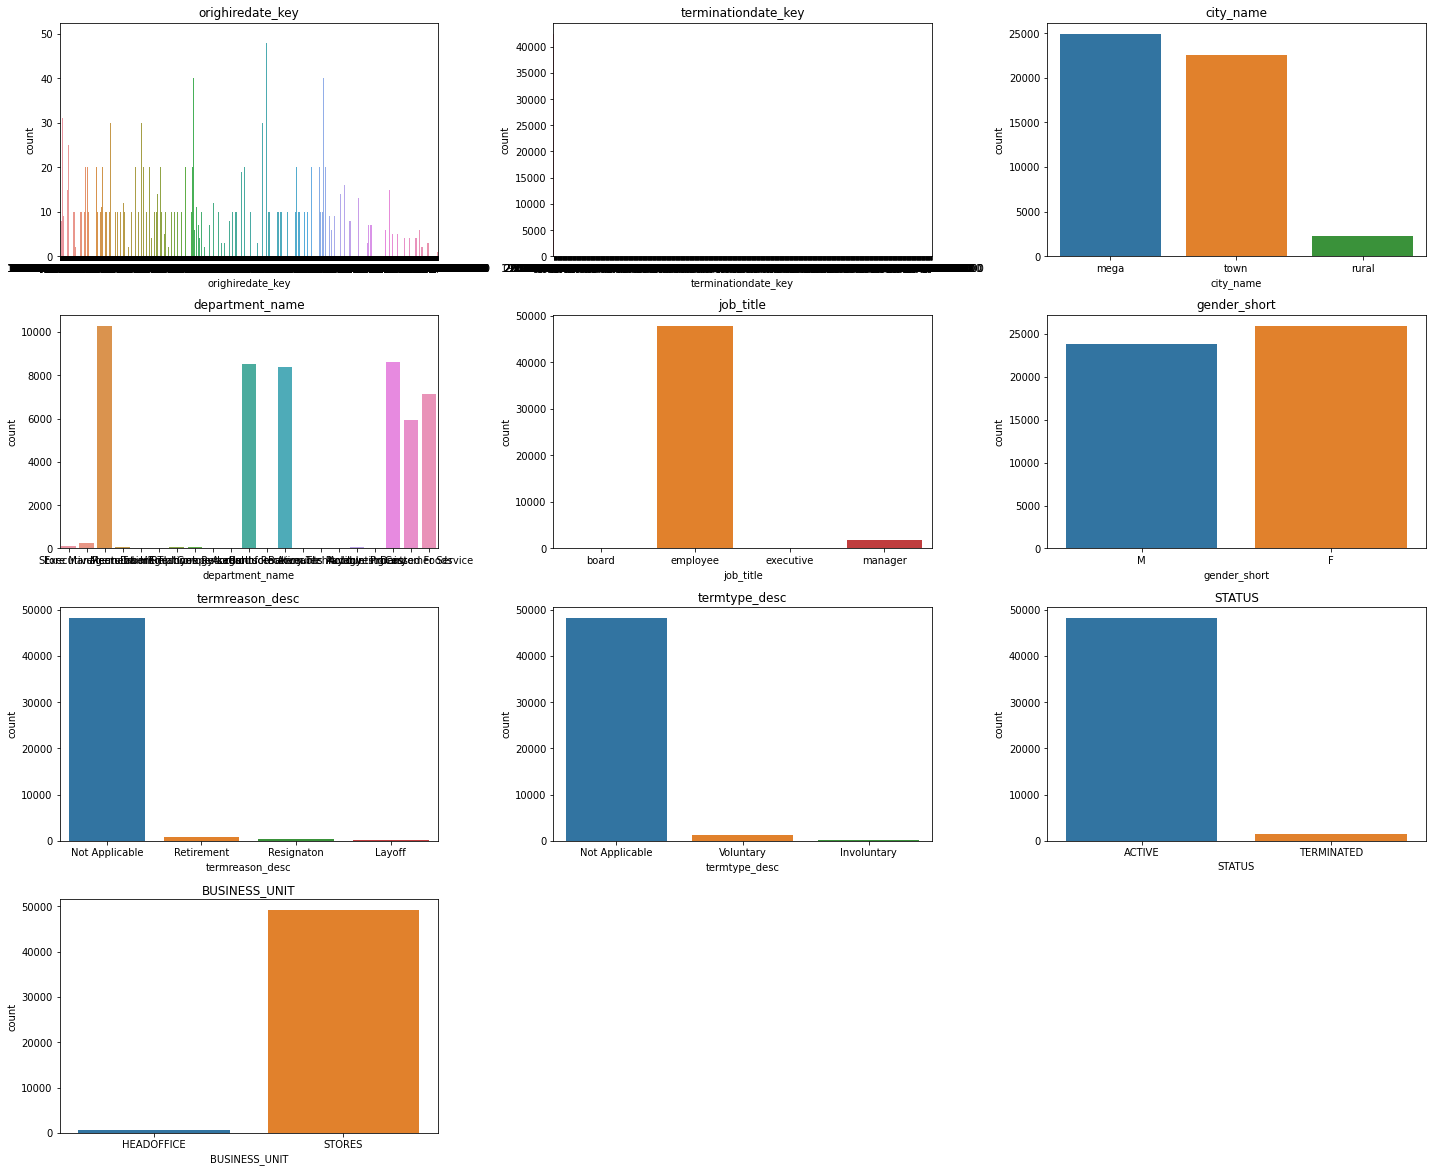

In [ ]:
#count plot for categorical variables
fig=plt.figure(figsize=(20,20))
for i in range(0,len(cat_num)):
   ax=fig.add_subplot(5,3,i+1)
   sns.countplot(df[cat_num[i]])
   ax.set_title(cat_num[i],color='Black')
plt.tight_layout()

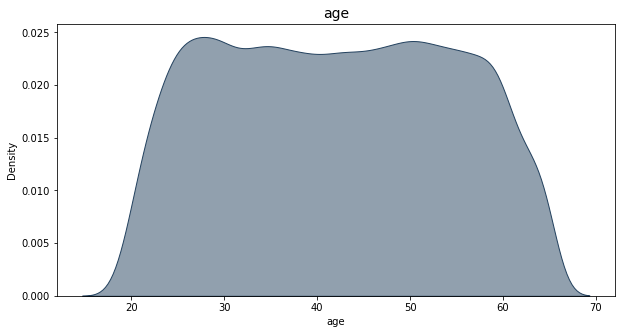

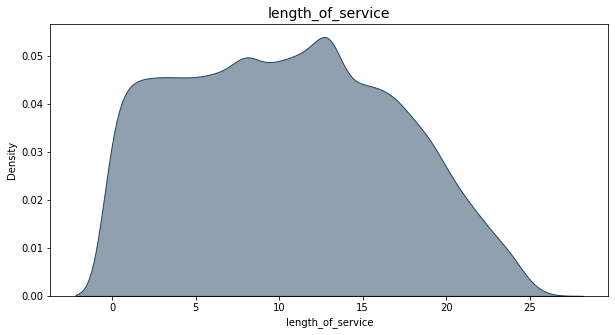

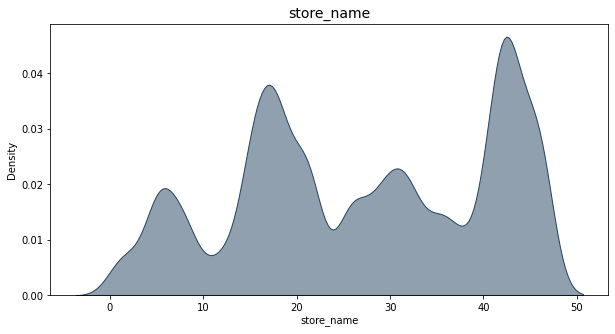

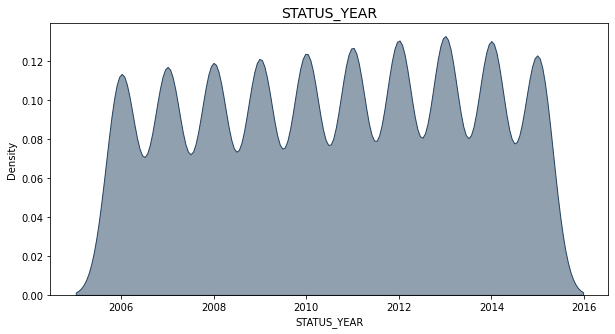

In [ ]:
# Kde plot for Numerical Variables
for column in num_var:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(df[column], color = '#24425f', shade = True, label = 'terminated', alpha = 0.5)
    plt.title(column, size = 14)

# **Label Encoding**

In [ ]:
# Create a label encoder object
le = LabelEncoder()

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['city_name']= label_encoder.fit_transform(df['city_name'])
df['job_title']= label_encoder.fit_transform(df['job_title'])
df['gender_short']= label_encoder.fit_transform(df['gender_short'])
df['termreason_desc']= label_encoder.fit_transform(df['termreason_desc'])
df['termtype_desc']= label_encoder.fit_transform(df['termtype_desc'])
df['STATUS']= label_encoder.fit_transform(df['STATUS'])
df['BUSINESS_UNIT']= label_encoder.fit_transform(df['BUSINESS_UNIT'])



In [ ]:
df.head()

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,8/28/1989,1900-01-01 00:00:00,52,17,0,Executive,0,35,1,1,1,2006,0,0
1,8/28/1989,1900-01-01 00:00:00,53,18,0,Executive,0,35,1,1,1,2007,0,0
2,8/28/1989,1900-01-01 00:00:00,54,19,0,Executive,0,35,1,1,1,2008,0,0
3,8/28/1989,1900-01-01 00:00:00,55,20,0,Executive,0,35,1,1,1,2009,0,0
4,8/28/1989,1900-01-01 00:00:00,56,21,0,Executive,0,35,1,1,1,2010,0,0


# **One Hot Encoding**

In [ ]:
df1= df

In [ ]:
# one-hot encode the two columns
one_hot = pd.get_dummies(df1, columns=['department_name', 'STATUS_YEAR'])

df2 = one_hot

In [ ]:
df2.head()

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS,BUSINESS_UNIT,department_name_Accounting,department_name_Accounts Payable,department_name_Accounts Receiveable,department_name_Audit,department_name_Bakery,department_name_Compensation,department_name_Customer Service,department_name_Dairy,department_name_Employee Records,department_name_Executive,department_name_HR Technology,department_name_Information Technology,department_name_Investment,department_name_Labor Relations,department_name_Legal,department_name_Meats,department_name_Processed Foods,department_name_Produce,department_name_Recruitment,department_name_Store Management,department_name_Training,STATUS_YEAR_2006,STATUS_YEAR_2007,STATUS_YEAR_2008,STATUS_YEAR_2009,STATUS_YEAR_2010,STATUS_YEAR_2011,STATUS_YEAR_2012,STATUS_YEAR_2013,STATUS_YEAR_2014,STATUS_YEAR_2015
0,8/28/1989,1900-01-01 00:00:00,52,17,0,0,35,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,8/28/1989,1900-01-01 00:00:00,53,18,0,0,35,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,8/28/1989,1900-01-01 00:00:00,54,19,0,0,35,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,8/28/1989,1900-01-01 00:00:00,55,20,0,0,35,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,8/28/1989,1900-01-01 00:00:00,56,21,0,0,35,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# **Correlation with Heatmap**

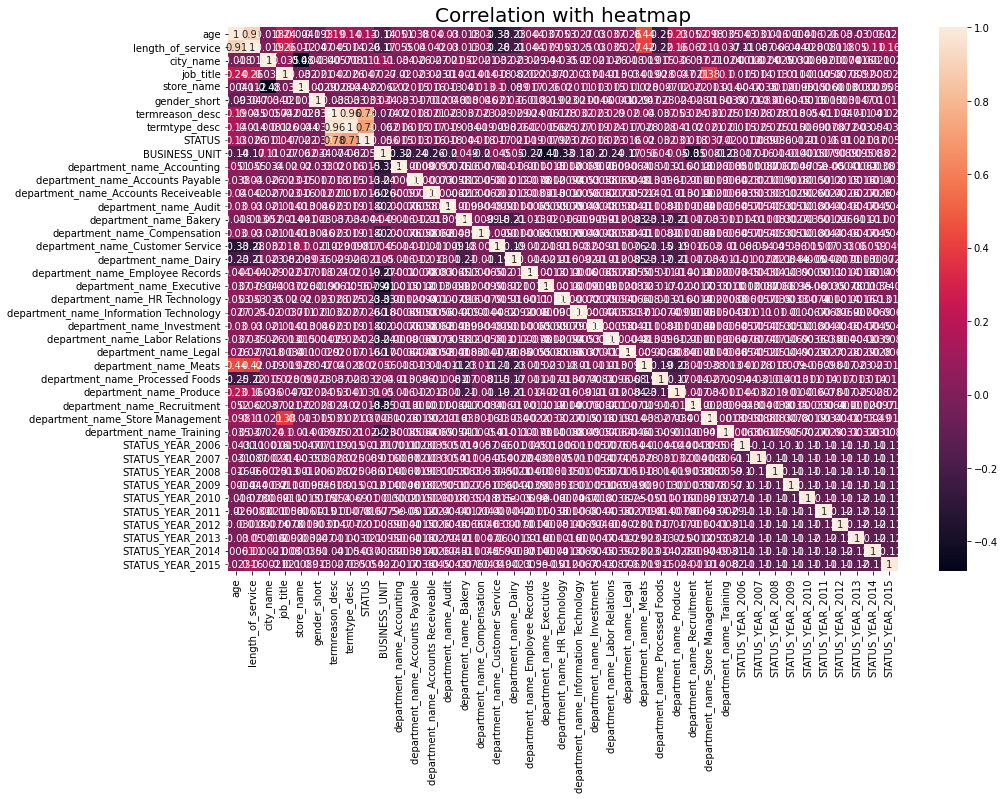

In [ ]:
# correlation
plt.figure(figsize=(15, 10))
sns.heatmap(df2.corr(), annot=True);
plt.title('Correlation with heatmap', fontsize=20);

In [ ]:
# checking correlation of STATUS w.r.t other features 
df.corr()['STATUS'].sort_values(ascending=False)[1:]

termreason_desc      0.78
termtype_desc        0.71
age                  0.13
job_title            0.05
length_of_service    0.03
city_name            0.01
STATUS_YEAR          0.00
store_name          -0.02
gender_short        -0.03
BUSINESS_UNIT       -0.06
Name: STATUS, dtype: float64

In [ ]:
''' dropping some columns '''
df2.drop(['termreason_desc', 'termtype_desc', 'orighiredate_key', 'terminationdate_key','age','length_of_service'], axis=1, inplace=True)

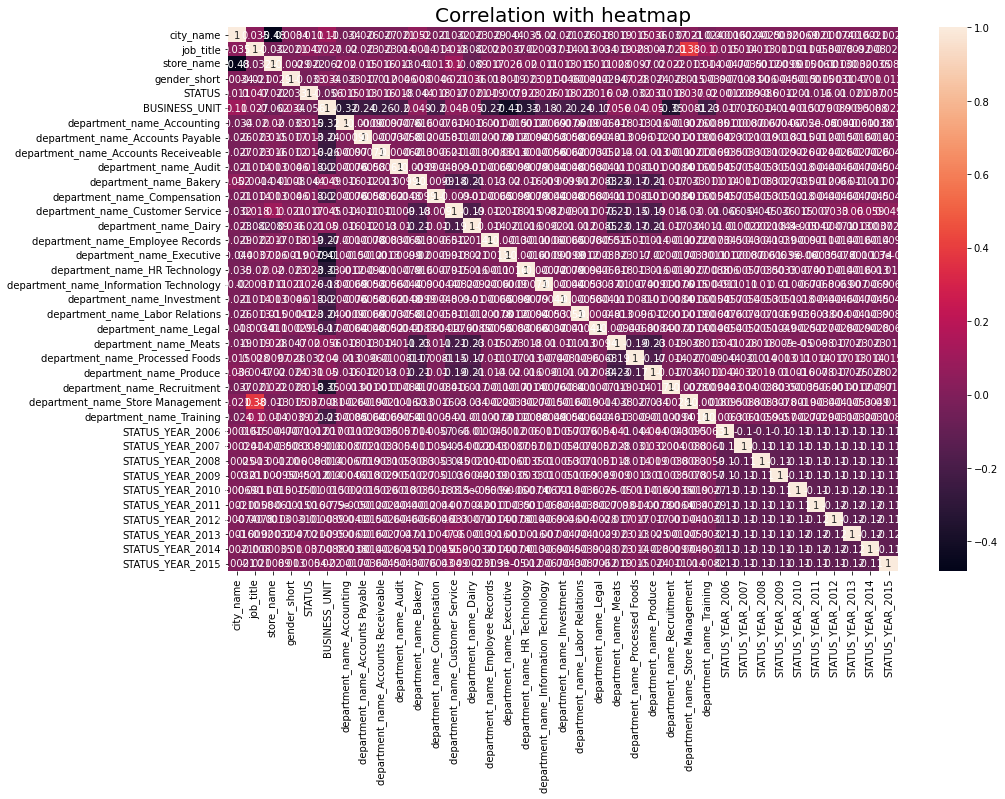

In [ ]:
# correlation
plt.figure(figsize=(15, 10))
sns.heatmap(df2.corr(), annot=True);
plt.title('Correlation with heatmap', fontsize=20);

In [ ]:
df2.head()

,city_name,job_title,store_name,gender_short,STATUS,BUSINESS_UNIT,department_name_Accounting,department_name_Accounts Payable,department_name_Accounts Receiveable,department_name_Audit,department_name_Bakery,department_name_Compensation,department_name_Customer Service,department_name_Dairy,department_name_Employee Records,department_name_Executive,department_name_HR Technology,department_name_Information Technology,department_name_Investment,department_name_Labor Relations,department_name_Legal,department_name_Meats,department_name_Processed Foods,department_name_Produce,department_name_Recruitment,department_name_Store Management,department_name_Training,STATUS_YEAR_2006,STATUS_YEAR_2007,STATUS_YEAR_2008,STATUS_YEAR_2009,STATUS_YEAR_2010,STATUS_YEAR_2011,STATUS_YEAR_2012,STATUS_YEAR_2013,STATUS_YEAR_2014,STATUS_YEAR_2015
0,0,0,35,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,35,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,35,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,35,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,35,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# **Train,Test,Split**

In [ ]:
# define the data into feature(X) and the target variable (y)
x=df2.drop("STATUS",axis=1)
y=df2["STATUS"]

In [ ]:
# split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.25,random_state=0)

# Initialize the scaler
sc = StandardScaler()

# Fit and transform the data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# **Machine learning Algorithms**

**1. Logistic Regression**

In [ ]:
# Initialize the model
model = LogisticRegression(random_state=0)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.9704081632653061


Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

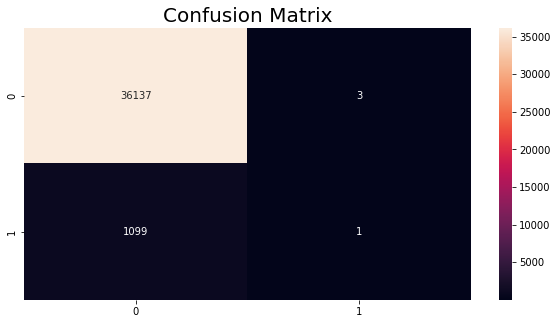

In [ ]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)

**2. Random Forest**

In [ ]:
# Initialize the model
model = RandomForestClassifier(n_estimators=100,oob_score=True, random_state=0)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9707841031149301


In [ ]:
# Check the OOB error
oob_error = 1 - model.oob_score_
print(f"OOB error: {oob_error}")

OOB error: 0.030774188350922382


Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

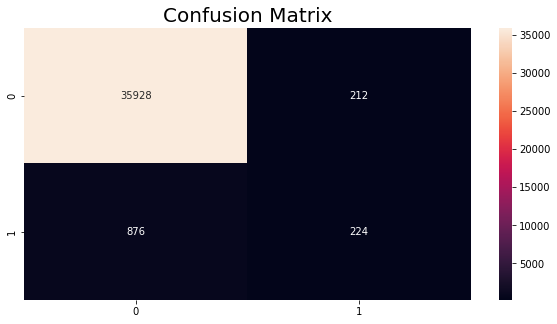

In [ ]:
print("Confusion Matrix: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)

**3. K-NN ALGORITHM**

In [ ]:
# Initialize the model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)

Accuracy:  0.9697099892588614


Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

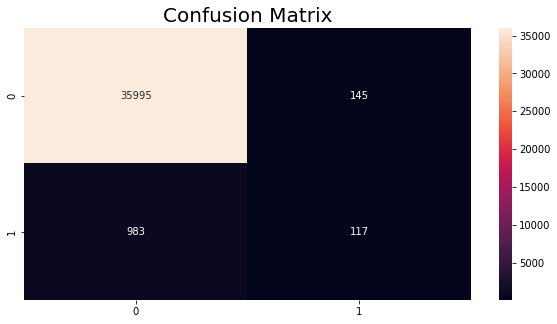

In [ ]:
print("Confusion Matrix: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)

**4. Decision tree model**

In [ ]:
# Initialize the model
model = DecisionTreeClassifier(random_state=0)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)

Accuracy:  0.9701933404940923


Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

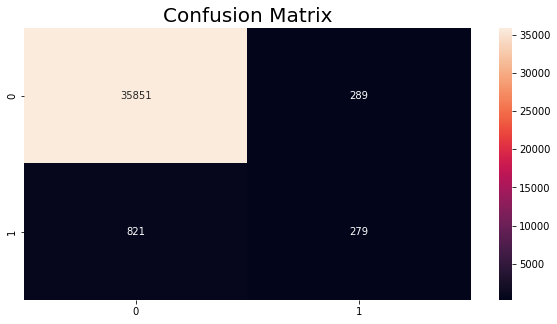

In [ ]:
print("Confusion Matrix: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)

# **Lazypredict**

In [ ]:
! pip install lazypredict


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lazypredict


In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

**Classification**

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [01:53<00:00,  3.92s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.97,0.63,0.63,0.97,0.42
DecisionTreeClassifier,0.97,0.62,0.62,0.97,0.16
ExtraTreeClassifier,0.97,0.60,0.60,0.96,0.14
ExtraTreesClassifier,0.97,0.59,0.59,0.96,3.06
RandomForestClassifier,0.97,0.59,0.59,0.96,1.53
NearestCentroid,0.76,0.59,0.59,0.84,0.13
LGBMClassifier,0.97,0.58,0.58,0.97,0.62
LabelSpreading,0.97,0.56,0.56,0.96,31.74
LabelPropagation,0.97,0.56,0.56,0.96,26.88
